<a href="https://colab.research.google.com/github/DEBMALYASEN/ABC/blob/master/CARDIO2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# THIS PROGRAM CLASSIFIES WHETHER A PERSON HAS CARDIOVASCULAR DISEASE OR NOT

In [2]:

#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#load the data
from google.colab import files
upoladed=files.upload()

Saving cardio_train.csv to cardio_train (3).csv


In [4]:
#STORE DATA IN VARIABLE
df=pd.read_csv('cardio_train.csv',sep=";")
#PRINT FIRST 10 ROWS
df.head(10)

id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0  ...     1      0     0       1       0
1   1  20228       1     156    85.0  ...     1      0     0       1       1
2   2  18857       1     165    64.0  ...     1      0     0       0       1
3   3  17623       2     169    82.0  ...     1      0     0       1       1
4   4  17474       1     156    56.0  ...     1      0     0       0       0
5   8  21914       1     151    67.0  ...     2      0     0       0       0
6   9  22113       1     157    93.0  ...     1      0     0       1       0
7  12  22584       2     178    95.0  ...     3      0     0       1       1
8  13  17668       1     158    71.0  ...     1      0     0       1       0
9  14  19834       1     164    68.0  ...     1      0     0       0       0

[10 rows x 13 columns]

In [5]:
df.drop('id',axis=1,inplace=True)
df.head()

age  gender  height  weight  ap_hi  ...  gluc  smoke  alco  active  cardio
0  18393       2     168    62.0    110  ...     1      0     0       1       0
1  20228       1     156    85.0    140  ...     1      0     0       1       1
2  18857       1     165    64.0    130  ...     1      0     0       0       1
3  17623       2     169    82.0    150  ...     1      0     0       1       1
4  17474       1     156    56.0    100  ...     1      0     0       0       0

[5 rows x 12 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
df.head(9)

age  gender  height  weight  ap_hi  ...  gluc  smoke  alco  active  cardio
0  18393       2     168    62.0    110  ...     1      0     0       1       0
1  20228       1     156    85.0    140  ...     1      0     0       1       1
2  18857       1     165    64.0    130  ...     1      0     0       0       1
3  17623       2     169    82.0    150  ...     1      0     0       1       1
4  17474       1     156    56.0    100  ...     1      0     0       0       0
5  21914       1     151    67.0    120  ...     2      0     0       0       0
6  22113       1     157    93.0    130  ...     1      0     0       1       0
7  22584       2     178    95.0    130  ...     3      0     0       1       1
8  17668       1     158    71.0    110  ...     1      0     0       1       0

[9 rows x 12 columns]

In [8]:
#DUPLICATE VALUES

print("There is {} duplicated values in data frame".format(df.duplicated().sum()))  

There is 24 duplicated values in data frame


In [9]:
duplicated = df[df.duplicated(keep=False)]

In [10]:
duplicated.head(10)

age  gender  height  weight  ap_hi  ...  gluc  smoke  alco  active  cardio
1142   17493       2     169    74.0    120  ...     1      0     0       1       1
1204   16793       1     165    68.0    120  ...     1      0     0       1       0
1568   21945       1     165    60.0    120  ...     1      0     0       1       0
1612   20293       1     162    70.0    110  ...     1      0     0       1       0
2305   20495       1     165    70.0    120  ...     1      0     0       1       0
2677   22077       1     175    69.0    120  ...     1      0     0       1       1
6325   14552       1     158    64.0    120  ...     1      0     0       1       0
8190   21778       1     160    58.0    120  ...     1      0     0       1       0
10494  16937       2     170    70.0    120  ...     1      0     0       0       0
10562  20495       1     165    70.0    120  ...     1      0     0       1       0

[10 rows x 12 columns]

In [11]:
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= True) 


In [12]:
duplicated #here count is 48   (as duplicates are repeated ,24 unique)

age  gender  height  weight  ap_hi  ...  gluc  smoke  alco  active  cardio
6325   14552       1     158    64.0    120  ...     1      0     0       1       0
40365  14552       1     158    64.0    120  ...     1      0     0       1       0
17101  16160       1     168    65.0    120  ...     1      0     0       1       1
64169  16160       1     168    65.0    120  ...     1      0     0       1       1
1204   16793       1     165    68.0    120  ...     1      0     0       1       0
21784  16793       1     165    68.0    120  ...     1      0     0       1       0
28300  16805       1     157    67.0    120  ...     1      0     0       1       0
60474  16805       1     157    67.0    120  ...     1      0     0       1       0
10494  16937       2     170    70.0    120  ...     1      0     0       0       0
44653  16937       2     170    70.0    120  ...     1      0     0       0       0
1142   17493       2     169    74.0    120  ...     1      0     0       1       1
50432  17493       2     169    74.0    120  ...     1      0     0       1       1
32683  17535       2     165    65.0    120  ...     1      0     0       1       0
56643  17535       2     165    65.0    120  ...     1      0     0       1       0
28997  18210       1     160    60.0    120  ...     1      0     0       1       0
65079  18210       1     160    60.0    120  ...     1      0     0       1       0
22694  18353       1     169    67.0    120  ...     1      0     0       1       0
42450  18353       1     169    67.0    120  ...     1      0     0       1       0
54716  18955       1     165    75.0    120  ...     1      0     0       1       1
57946  18955       1     165    75.0    120  ...     1      0     0       1       1
47733  18979       1     165    65.0    120  ...     1      0     0       0       0
62318  18979       1     165    65.0    120  ...     1      0     0       0       0
10777  18988       1     164    65.0    120  ...     1      0     0       1       0
38505  18988       1     164    65.0    120  ...     1      0     0       1       0
20040  19059       1     165    65.0    120  ...     1      0     0       1       1
66190  19059       1     165    65.0    120  ...     1      0     0       1       1
16333  19858       1     165    68.0    120  ...     1      0     0       1       0
58730  19858       1     165    68.0    120  ...     1      0     0       1       0
1612   20293       1     162    70.0    110  ...     1      0     0       1       0
56906  20293       1     162    70.0    110  ...     1      0     0       1       0
2305   20495       1     165    70.0    120  ...     1      0     0       1       0
10562  20495       1     165    70.0    120  ...     1      0     0       1       0
24356  20516       1     164    66.0    120  ...     1      0     0       0       0
60453  20516       1     164    66.0    120  ...     1      0     0       0       0
38589  21119       1     160    60.0    120  ...     1      0     0       0       1
68281  21119       1     160    60.0    120  ...     1      0     0       0       1
17168  21230       1     164    62.0    120  ...     1      0     0       1       0
45810  21230       1     164    62.0    120  ...     1      0     0       1       0
21871  21280       1     165    65.0    120  ...     1      0     0       1       0
45125  21280       1     165    65.0    120  ...     1      0     0       1       0
8190   21778       1     160    58.0    120  ...     1      0     0       1       0
65622  21778       1     160    58.0    120  ...     1      0     0       1       0
40301  21943       1     165    65.0    120  ...     1      0     0       1       1
52552  21943       1     165    65.0    120  ...     1      0     0       1       1
1568   21945       1     165    60.0    120  ...     1      0     0       1       0
48917  21945       1     165    60.0    120  ...     1      0     0       1       0
2677   22077       1     175    69.0    120  ...     1      0

In [13]:
#NO OF DUPLICATES

df.duplicated().sum()

24

In [14]:
#REMOVING OR DROPPING DUPLICATES

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
#GET SHAPE OF DATA
df.shape


(69976, 12)

In [16]:
df.head(10)

age  gender  height  weight  ap_hi  ...  gluc  smoke  alco  active  cardio
0  18393       2     168    62.0    110  ...     1      0     0       1       0
1  20228       1     156    85.0    140  ...     1      0     0       1       1
2  18857       1     165    64.0    130  ...     1      0     0       0       1
3  17623       2     169    82.0    150  ...     1      0     0       1       1
4  17474       1     156    56.0    100  ...     1      0     0       0       0
5  21914       1     151    67.0    120  ...     2      0     0       0       0
6  22113       1     157    93.0    130  ...     1      0     0       1       0
7  22584       2     178    95.0    130  ...     3      0     0       1       1
8  17668       1     158    71.0    110  ...     1      0     0       1       0
9  19834       1     164    68.0    110  ...     1      0     0       0       0

[10 rows x 12 columns]

In [17]:
#COUNT EMPTY VALUES IN DATA
df.isna().sum()


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [18]:
#ANoTHER WAY TO CHECK FOR NULL VALUE
df.isnull().values.any()


False

In [19]:
#VIEW SOME BASIC STATISTICS
df.describe()

age        gender  ...        active        cardio
count  69976.000000  69976.000000  ...  69976.000000  69976.000000
mean   19468.950126      1.349648  ...      0.803718      0.499771
std     2467.374620      0.476862  ...      0.397187      0.500004
min    10798.000000      1.000000  ...      0.000000      0.000000
25%    17664.000000      1.000000  ...      1.000000      0.000000
50%    19703.000000      1.000000  ...      1.000000      0.000000
75%    21327.000000      2.000000  ...      1.000000      1.000000
max    23713.000000      2.000000  ...      1.000000      1.000000

[8 rows x 12 columns]

In [20]:
#GET A COUNT OF NUMBER OF PATIENTS WITH A HEART DISEASE AND NOT WITH A HEART DISEASE
df['cardio'].value_counts()

0    35004
1    34972
Name: cardio, dtype: int64

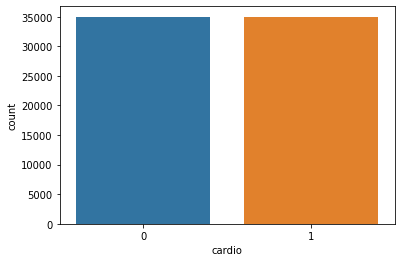

In [21]:
#VISUALIZE THE COUNT
sns.countplot(df['cardio'])

In [22]:
#ADDING BMI

df["bmi"] = df["weight"] / (df["height"]/100)**2


In [23]:
#OUTLIERS
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200))
df = df[~out_filter]
out_filter2 = ((df["ap_hi"] < 0) | (df["ap_lo"] < 0))
df = df[~out_filter2]

In [24]:
df.shape

(68975, 13)

In [25]:
df.head(3)

age  gender  height  weight  ap_hi  ...  smoke  alco  active  cardio        bmi
0  18393       2     168    62.0    110  ...      0     0       1       0  21.967120
1  20228       1     156    85.0    140  ...      0     0       1       1  34.927679
2  18857       1     165    64.0    130  ...      0     0       0       1  23.507805

[3 rows x 13 columns]

In [26]:
len(df)

68975

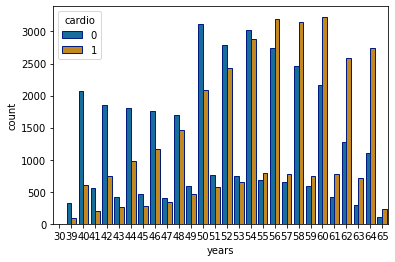

In [27]:

#LOOK AT THE NUMBER OF PEOPLE WITH A CARDIOVASCULAR DISEASE THAT EXCEEDS NUMBER OF PEOPLE WITHOUT A CARDIO VASCULAR DISEASE
#CREATE A YEARS COLUMN
df['years']=(df['age']/365).round(0)
df['years']=pd.to_numeric(df['years'],downcast='integer')

#VISUALIZE
sns.countplot(x='years',hue='cardio',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [86]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     \ 47.1MB 826kB/s
     |████████████████████████████████| 71kB 2.8MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 604kB 33.3MB/s 
     |████████████████████████████████| 3.1MB 41.6MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
     |████████████████████████████████| 296kB 31.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=71464622c5efdac2e9687bce1500a6bffbd03554a13c9a3d9c514984331e549b
  Stored in directory: /tmp/pip-ephem-wheel-cache-p_qglte_/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=a0a2d6838be39fb36a1808fe32c06fb80adf07adb32c9896b5519ad89383f7f7
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2919

In [28]:
#PANDAS PROFILING

import pandas_profiling 
profile = pandas_profiling.ProfileReport(df)
profile

In [69]:
#GET THE CORRELATION OF THE COLUMNS
df.corr()

age    gender    height  ...    active    cardio     years
age          1.000000 -0.022763 -0.081546  ... -0.009918  0.238189  0.999090
gender      -0.022763  1.000000  0.499080  ...  0.005917  0.008037 -0.022971
height      -0.081546  0.499080  1.000000  ... -0.006569 -0.010871 -0.081483
weight       0.053697  0.155320  0.290983  ... -0.016863  0.181599  0.053672
ap_hi        0.020765  0.005996  0.005488  ... -0.000031  0.054475  0.020794
ap_lo        0.017647  0.015241  0.006151  ...  0.004784  0.065717  0.017753
cholesterol  0.154432 -0.035915 -0.050225  ...  0.009927  0.221119  0.154392
gluc         0.098704 -0.020558 -0.018592  ... -0.006761  0.089268  0.098595
smoke       -0.047650  0.338131  0.188003  ...  0.025870 -0.015533 -0.047903
alco        -0.029735  0.170950  0.094425  ...  0.025486 -0.007366 -0.029931
active      -0.009918  0.005917 -0.006569  ...  1.000000 -0.035666 -0.009810
cardio       0.238189  0.008037 -0.010871  ... -0.035666  1.000000  0.237778
years        0.999090 -0.022971 -0.081483  ... -0.009810  0.237778  1.000000

[13 rows x 13 columns]

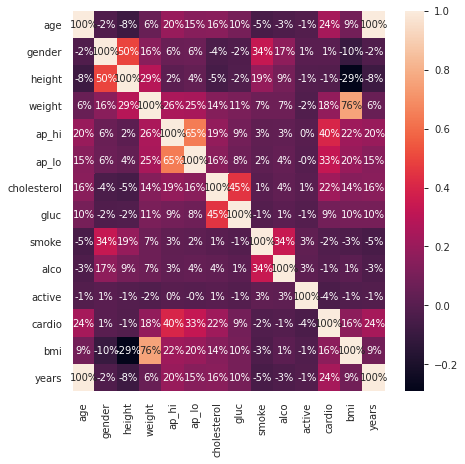

In [29]:
#VISUALIZE THE DATA
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))    # 7*7 INCHES
sns.heatmap(df.corr(),annot=True,fmt='.0%')# fmt = format

In [36]:
df.head(10)

age  gender  height  weight  ap_hi  ...  smoke  alco  active  cardio        bmi
0  18393       2     168    62.0    110  ...      0     0       1       0  21.967120
1  20228       1     156    85.0    140  ...      0     0       1       1  34.927679
2  18857       1     165    64.0    130  ...      0     0       0       1  23.507805
3  17623       2     169    82.0    150  ...      0     0       1       1  28.710479
4  17474       1     156    56.0    100  ...      0     0       0       0  23.011177
5  21914       1     151    67.0    120  ...      0     0       0       0  29.384676
6  22113       1     157    93.0    130  ...      0     0       1       0  37.729725
7  22584       2     178    95.0    130  ...      0     0       1       1  29.983588
8  17668       1     158    71.0    110  ...      0     0       1       0  28.440955
9  19834       1     164    68.0    110  ...      0     0       0       0  25.282570

[10 rows x 13 columns]

In [38]:
#DROP YEARS COLUMN and BMI
#df=df.drop('years',axis=1)
df=df.drop('bmi',axis=1)

In [39]:
df.head(10)

age  gender  height  weight  ap_hi  ...  gluc  smoke  alco  active  cardio
0  18393       2     168    62.0    110  ...     1      0     0       1       0
1  20228       1     156    85.0    140  ...     1      0     0       1       1
2  18857       1     165    64.0    130  ...     1      0     0       0       1
3  17623       2     169    82.0    150  ...     1      0     0       1       1
4  17474       1     156    56.0    100  ...     1      0     0       0       0
5  21914       1     151    67.0    120  ...     2      0     0       0       0
6  22113       1     157    93.0    130  ...     1      0     0       1       0
7  22584       2     178    95.0    130  ...     3      0     0       1       1
8  17668       1     158    71.0    110  ...     1      0     0       1       0
9  19834       1     164    68.0    110  ...     1      0     0       0       0

[10 rows x 12 columns]

In [61]:
#SPLIT THE DATA INTO FEATURE AND TARGET DATA
X=df.iloc[:,:-1]#ALL THE ROWS ALL THE COLUMN EXCEPT LAST COLUMN
Y=df.iloc[:,-1]#ALL ROWS OF THE LAST COLUMN

#target = 'cardio'
#Y = df[target]
#df = df.drop([target], axis=1)

In [62]:
X

age  gender  height  weight  ...  gluc  smoke  alco  active
0      18393       2     168    62.0  ...     1      0     0       1
1      20228       1     156    85.0  ...     1      0     0       1
2      18857       1     165    64.0  ...     1      0     0       0
3      17623       2     169    82.0  ...     1      0     0       1
4      17474       1     156    56.0  ...     1      0     0       0
...      ...     ...     ...     ...  ...   ...    ...   ...     ...
69995  19240       2     168    76.0  ...     1      1     0       1
69996  22601       1     158   126.0  ...     2      0     0       1
69997  19066       2     183   105.0  ...     1      0     1       0
69998  22431       1     163    72.0  ...     2      0     0       0
69999  20540       1     170    72.0  ...     1      0     0       1

[68975 rows x 11 columns]

In [63]:
Y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 68975, dtype: int64

In [76]:
#SPLIT THE DATA INTO TRAIN(75%) AND TEST(25%) DATA
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=0)

In [77]:
X_train

age  gender  height  weight  ...  gluc  smoke  alco  active
25840  21041       1     165    60.0  ...     1      0     0       1
46666  17546       1     159   109.0  ...     2      1     0       0
54548  15326       2     182    93.0  ...     1      1     0       1
67956  16703       2     173    80.0  ...     1      1     0       1
43953  21375       1     169    70.0  ...     1      0     0       1
...      ...     ...     ...     ...  ...   ...    ...   ...     ...
21555  18207       1     160    78.0  ...     1      0     0       1
46564  22444       2     168    72.0  ...     1      0     0       1
43238  18199       1     168    96.0  ...     1      0     0       1
44205  21245       1     168    70.0  ...     2      0     0       1
69281  16927       1     164    61.0  ...     1      0     0       1

[51731 rows x 11 columns]

In [78]:
Y_train

25840    0
46666    1
54548    1
67956    1
43953    1
        ..
21555    0
46564    1
43238    1
44205    1
69281    0
Name: cardio, Length: 51731, dtype: int64

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51731 entries, 25840 to 69281
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          51731 non-null  int64  
 1   gender       51731 non-null  int64  
 2   height       51731 non-null  int64  
 3   weight       51731 non-null  float64
 4   ap_hi        51731 non-null  int64  
 5   ap_lo        51731 non-null  int64  
 6   cholesterol  51731 non-null  int64  
 7   gluc         51731 non-null  int64  
 8   smoke        51731 non-null  int64  
 9   alco         51731 non-null  int64  
 10  active       51731 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 4.7 MB


In [80]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17244 entries, 51756 to 51338
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          17244 non-null  int64  
 1   gender       17244 non-null  int64  
 2   height       17244 non-null  int64  
 3   weight       17244 non-null  float64
 4   ap_hi        17244 non-null  int64  
 5   ap_lo        17244 non-null  int64  
 6   cholesterol  17244 non-null  int64  
 7   gluc         17244 non-null  int64  
 8   smoke        17244 non-null  int64  
 9   alco         17244 non-null  int64  
 10  active       17244 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.6 MB


In [81]:
# Y_train.info() or Y_test.info() dosen't execute
X_train

age  gender  height  weight  ...  gluc  smoke  alco  active
25840  21041       1     165    60.0  ...     1      0     0       1
46666  17546       1     159   109.0  ...     2      1     0       0
54548  15326       2     182    93.0  ...     1      1     0       1
67956  16703       2     173    80.0  ...     1      1     0       1
43953  21375       1     169    70.0  ...     1      0     0       1
...      ...     ...     ...     ...  ...   ...    ...   ...     ...
21555  18207       1     160    78.0  ...     1      0     0       1
46564  22444       2     168    72.0  ...     1      0     0       1
43238  18199       1     168    96.0  ...     1      0     0       1
44205  21245       1     168    70.0  ...     2      0     0       1
69281  16927       1     164    61.0  ...     1      0     0       1

[51731 rows x 11 columns]

In [82]:
#FEATURE SCALING
#SCALE THE VALUES BETWEEN 0 AND 1 INCLUSIVE
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [85]:
X_train

array([[ 0.63644378, -0.73495793,  0.07758945, ..., -0.30990677,
        -0.23858129,  0.49612475],
       [-0.77807753, -0.73495793, -0.6502258 , ...,  3.22677689,
        -0.23858129, -2.0156221 ],
       [-1.67657176,  1.3606221 ,  2.13973264, ...,  3.22677689,
        -0.23858129,  0.49612475],
       ...,
       [-0.51379072, -0.73495793,  0.44149707, ..., -0.30990677,
        -0.23858129,  0.49612475],
       [ 0.71900811, -0.73495793,  0.44149707, ..., -0.30990677,
        -0.23858129,  0.49612475],
       [-1.02860362, -0.73495793, -0.04371309, ..., -0.30990677,
        -0.23858129,  0.49612475]])

In [87]:
X_test.shape

(17244, 11)

In [86]:
X_train.shape

(51731, 11)

In [90]:
#DATA NORMALIZATION   scales up the value
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_test = normalize(X_test)
X= normalize(X)

In [91]:
X_train

array([[ 0.22125296, -0.25550036,  0.02697315, ..., -0.10773582,
        -0.08294027,  0.17247253],
       [-0.13844831, -0.13077576, -0.11569883, ...,  0.57416105,
        -0.0424523 , -0.35865253],
       [-0.31955864,  0.25933787,  0.40783823, ...,  0.6150315 ,
        -0.04547417,  0.09456258],
       ...,
       [-0.16123716, -0.23064357,  0.13855006, ..., -0.09725455,
        -0.07487128,  0.15569325],
       [ 0.33596192, -0.34341459,  0.20629281, ..., -0.14480625,
        -0.11147889,  0.231818  ],
       [-0.55615756, -0.39738573, -0.02363531, ..., -0.16756405,
        -0.12899895,  0.26825059]])

In [95]:
#MODEL SELECTION

#IMPORTING LIBRARIES


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#FEEDING CLASSIFIERS

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()


#TAKING A DICTIONARY FOR MODELS


models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}


scores= { }

#TRAVERSING OVER THE MODEL

for key, value in models.items():    
    model = value
    model.fit(X_train, Y_train)
    scores[key] = model.score(X_test, Y_test)

In [96]:
#TEST THE MODEL ACCURACY ON TRAINING.

scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame


Accuracy Score
SVM                  0.737590
KNN                  0.731501
Random forest        0.724542
Naive bayes          0.713814
Decision tree        0.621666

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

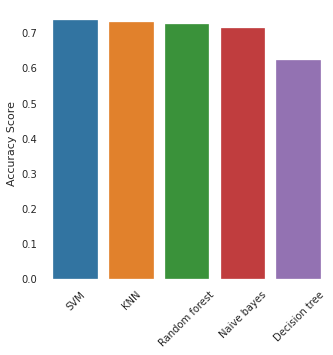

In [97]:
#HISTOGRAM PLOT
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45) 

SVM ,KNN AND RANDOM FOREST WORKS GOOD


In [100]:
#K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=X_train, y=Y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
accuracies_svm = cross_val_score(estimator=svm, X=X_train, y=Y_train, cv=10)

In [101]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())
print("SVM Average accuracy: ", accuracies_svm.mean())
print("SVM Standart Deviation: ", accuracies_svm.std())

Random Forest Average accuracy:  0.7100384373651929
Random Forest Standart Deviation:  0.005613588258469103
KNN Average accuracy:  0.7248844372048348
KNN Standart Deviation:  0.004839924092142976
SVM Average accuracy:  0.7306643367172672
SVM Standart Deviation:  0.0043367469068495


standard deviation proves the consistency of our answer

WE WILL NOW TUNE HYPERPARAMETERS
IN 
RANDOM FOREST AND LOGISTIC REGRESSION

In [102]:
from sklearn.model_selection import GridSearchCV  #GRID SEARCH CV WITH ONE HYPERPARAMETER

grid = {"n_estimators" : np.arange(10,150,10)}# 10 ,20,30, ...,150

ran_cv = GridSearchCV(ran, grid, cv=3) # GridSearchCV

ran_cv.fit(X_train,Y_train)# Fit

# Print hyperparameter

print("Tuned hyperparameter n_estimators: {}".format(ran_cv.best_params_)) 

print("Best score: {}".format(ran_cv.best_score_))

Tuned hyperparameter n_estimators: {'n_estimators': 120}
Best score: 0.71054105268083


In [103]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", max_iter=200)

grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(60,80,2)} #DICTIONARY #l1 ,l2 regularizer

log_reg_cv = GridSearchCV(log_reg, grid, cv=3)

log_reg_cv.fit(X_train, Y_train)

# Print hyperparameter

print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_))

print("Best score: {}".format(log_reg_cv.best_score_))

Tuned hyperparameter n_estimators: {'C': 60, 'penalty': 'l1'}
Best score: 0.7256190770074108


PERHAPS THE BEST RESULT WE CAN GET

In [104]:
logreg_best = LogisticRegression(C=60, penalty="l1", solver="liblinear")
logreg_best.fit(X_train, Y_train)
print("Test accuracy: ",logreg_best.score(X_test, Y_test))

Test accuracy:  0.7325446532127117


CONFUSION MATRIX


In [108]:
Y_true = Y_test
Y_pred = logreg_best.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, Y_pred)


In [111]:
cm

array([[6681, 1938],
       [2674, 5951]])

In [112]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
 
pd.DataFrame([[Precision, Recall, F1_Score]],columns=["Precision", "Recall", "F1 Score"], index=["Results"])

Precision    Recall  F1 Score
Results   0.754341  0.689971  0.720722

High precision relates to the low false positive rate


High recall relates to the low false negative rate